In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [6]:
# Load NIR SPECTRA data

# path to csv file 
csv_file = ''
df = pd.read_csv(url, sep=';')

# EDA

In [7]:
# Check if there are missing values in data. There is no missing da
df.isnull().values.any()

False

In [28]:
pd.set_option('display.max_columns', 682)

In [9]:
# inspect data frame. Looks as expected.
df.describe(include='all')

,1,12.7399998,0.597481551,0.595977961,0.593622563,0.59084015,0.587451342,0.58309162,0.578666445,0.572133661,...,0.119547803,0.118790853,0.118170371,0.117521899,0.116919191,0.116421905,0.115860794,0.115366549,0.114875999,0.114548182
count,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,...,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000
mean,1955.000000,31.251872,0.673571,0.673062,0.672309,0.671301,0.669966,0.668339,0.666450,0.664196,...,0.180291,0.179079,0.177935,0.176886,0.175936,0.175072,0.174264,0.173542,0.172920,0.172381
std,1127.998079,20.044695,0.177422,0.176957,0.176462,0.175936,0.175370,0.174794,0.174211,0.173653,...,0.099342,0.098578,0.097819,0.097098,0.096409,0.095751,0.095139,0.094559,0.094038,0.093542
min,2.000000,3.060644,0.225217,0.226202,0.227226,0.228200,0.229130,0.230069,0.230942,0.231759,...,0.031046,0.030999,0.030906,0.030781,0.030699,0.030650,0.030605,0.030532,0.030445,0.030424
25%,978.500000,13.096923,0.561761,0.560820,0.560010,0.558301,0.556339,0.553318,0.550153,0.545579,...,0.099670,0.099211,0.098733,0.098215,0.097765,0.097524,0.097333,0.097078,0.096996,0.096820
50%,1955.000000,22.770001,0.715442,0.714649,0.714371,0.713675,0.712351,0.710553,0.708622,0.705883,...,0.155032,0.154056,0.153249,0.152533,0.151974,0.151479,0.151025,0.150633,0.150290,0.149877
75%,2931.500000,51.250000,0.813249,0.812535,0.812112,0.811110,0.809623,0.807910,0.806061,0.804383,...,0.271606,0.269236,0.267274,0.265850,0.264381,0.262821,0.261679,0.260660,0.259714,0.258582
max,3908.000000,76.603981,1.177985,1.175869,1.173260,1.169968,1.166016,1.161484,1.156248,1.150484,...,0.426555,0.423630,0.420794,0.418019,0.415396,0.412957,0.410568,0.408270,0.406054,0.403849


In [10]:
# remove 1st and 2nd column in df. 1 st column is sample number and 2nd is protein content of milk.
# X is thus NIR spectra data.
X = df.drop(df.columns[[0,1]], axis=1)

# y is protein content of milk.
y = df[df.columns[1]]

In [11]:
# check for outliers. There seems to be nothing odd here
print("max(X) = " + str(df.values.max()))
print("min(X) = " + str(df.values.min()))
print("max(y) = " + str(np.max(y)))
print("min(y) = " + str(np.min(y)))


max(X) = 3908.0
min(X) = 0.030423662999999997
max(y) = 76.603981
min(y) = 3.0606437


### Check for multicolinearity in NIR-spectra data

In [12]:
corr=np.corrcoef(X)

In [13]:
W,V=np.linalg.eig(corr)

In [14]:
# Due to truncation and rounding error of the numpy linalg algorithm the eigenvalues in W will 
# have small complex components which we remove.
W_real = np.real(W)  

In [15]:
# Clearly there are eigenvalues of the correlation matrix which are close to 0. This implies that 
# there the NIR channels are multi-collinear. Multi-collinearity will prevent us from building an 
# efficient predictor (the standard errors of coefficients in a regression model will be 
#overinflated), unless we address it by for example pca. 
W_real

array([ 3.68734550e+03,  1.59728547e+02,  3.29638777e+01, ...,
       -2.37440314e-32, -2.37440314e-32, -1.27044470e-41])

### We verify graphically that the data is separable by dimension reduction through PCA 

Projecting 680-dimensional data to 2D


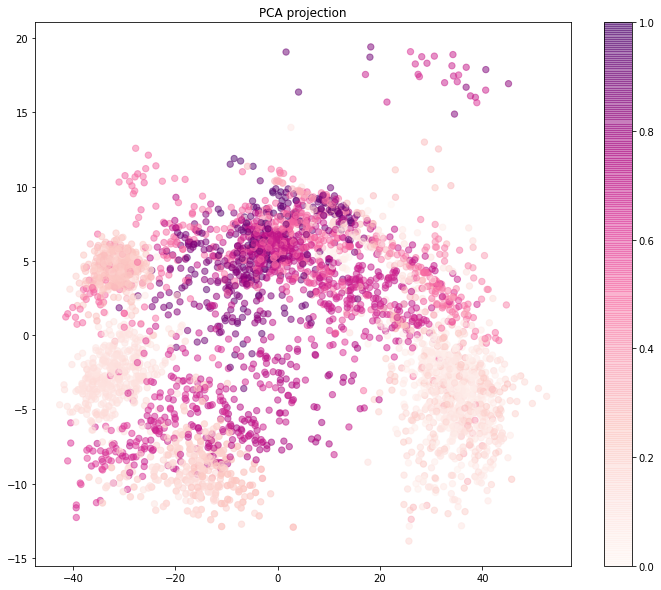

In [16]:
X_scaled = StandardScaler().fit_transform(X)
y = df[df.columns[1]]
y_norm = (y - np.min(y))/(np.max(y)-np.min(y))

pca = decomposition.PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

print('Projecting %d-dimensional data to 2D' % X_scaled.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=y_norm, alpha=0.5, s=40,cmap = 'RdPu')
plt.colorbar()
plt.title('PCA projection');

### Additionally verify graphically that the data is separable by dimension reduction through t-SNE. 
This provides a non-linear embedding in 2d, and thus we can more clearly see the separability. However we proceed with PCA, as this is standard way (and first recourse) to resolving multicollinerity.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3907 samples in 0.187s...
[t-SNE] Computed neighbors for 3907 samples in 4.144s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3907
[t-SNE] Computed conditional probabilities for sample 2000 / 3907
[t-SNE] Computed conditional probabilities for sample 3000 / 3907
[t-SNE] Computed conditional probabilities for sample 3907 / 3907
[t-SNE] Mean sigma: 1.457937
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.024986
[t-SNE] KL divergence after 2000 iterations: 0.576321


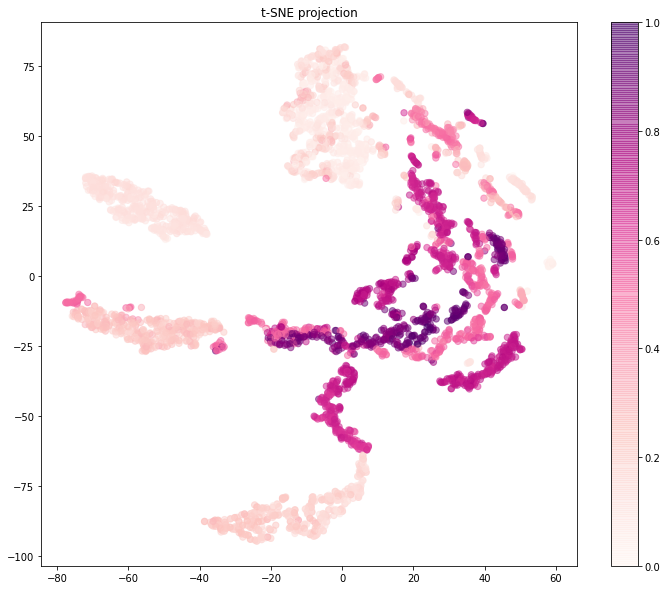

In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000,random_state = 17)

df_tsne_scaled = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12,10))
plt.scatter(df_tsne_scaled[:, 0], df_tsne_scaled[:, 1], c=y_norm, 
            alpha=0.5, s=40,cmap = 'RdPu')
plt.colorbar()
plt.title('t-SNE projection');

#### Classification of NIR spectra using PCA is not a novel concept (https://nirpyresearch.com/classification-nir-spectra-principal-component-analysis-python/): 'PCA is nearly invariably used in the analysis of NIR data', 'NIR spectra are fairly information-poor, that is they never contains sharp features, such as absorption peaks, as it may be the case for Raman or MIR spectroscopy. For this reason, most of the features of NIR spectra at different wavelengths are highly correlated'.

### Determine how many PCA components are needed to describe the data. If we choose 6 components we preserve approx 99 % of variance in the data.

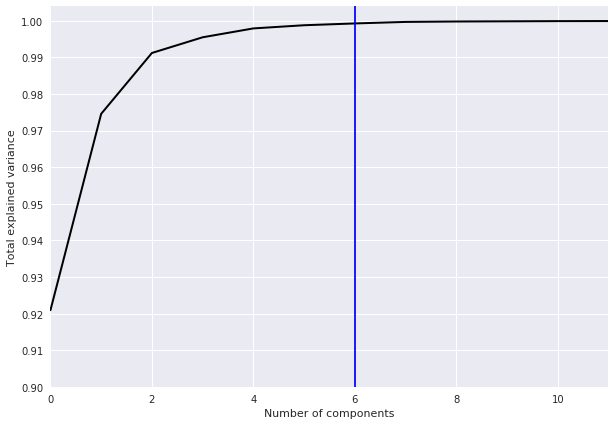

In [24]:
pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 11)
plt.yticks(np.arange(0.9, 1.01, 0.01))
plt.axvline(6, c='b')
plt.show();

# Train and validate predictor

In [9]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

pca = decomposition.PCA(n_components=6)
X_pca_scaled = pca.fit_transform(X_scaled)
# Since we are projecting the data into a lower dimension we are sacrificing interpretability
# in the sense that we cannot say which individual channel is important for the result.
# Since we are building predictor taking in a NIR spectra signal with the aim of predicting
# protein content, we do not need to know which individual channel contributes in what way
# to the result.

predictors = X_pca_scaled
targets = y 

# Create Random Forest Regressor model with 100 estimators
# We are predicting a continous quantity and so a regression model in appropriate.
# This is an ensemble model which utilizes 100 weak estimators which by
# averaging gives the result.

model = RandomForestRegressor(n_estimators=100)

# Train and cross-validate model over 10 folds
n_cv_folds = 10

# Train and cross-validate (cv measure:RMSE)
scores_rmse = np.sqrt(-cross_val_score(model, predictors, targets, cv=n_cv_folds, 
                                       scoring='neg_mean_squared_error'))

print("Average RMSE over " + str(n_cv_folds) + " cross-val folds = " + str(scores_rmse.mean()))
# Train and cross-validate (cv measure:R-squared)
scores_r2 = cross_val_score(model, predictors, targets, cv=n_cv_folds, scoring='r2')
print("Average R-squared coefficient over " + str(n_cv_folds) + " cross-val folds = " + str(scores_r2.mean()))


Average RMSE over 10 cross-val folds = 2.9977335284364246
Average R-squared coefficient over 10 cross-val folds = 0.9780546736495971


#### The average r-squared coefficient (0.98) is very good indicating a high performing predictor. The average RMSE is also 2.99 compared to the range of our target data. However below I will also compute normalized RMSE, to further highlight how good this result is.

In [22]:
n_splits = 10
cv = model_selection.KFold(n_splits=n_splits)

total_nrmse = 0

for train_index, test_index in cv.split(X):
    X_train, X_test = predictors[train_index], predictors[test_index]
    y_train, y_test = targets[train_index], targets[test_index]

    # For training, fit() is used
    model.fit(X_train, y_train)

    # For other metrics, we need the predictions of the model
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    range_y_test = np.max(y_test)-np.min(y_test)
    norm_rmse = rmse/range_y_test
    
    total_nrmse = total_nrmse + norm_rmse
    
print("Average NRMSE = " + str(total_nrmse/n_splits))

Average NRMSE = 0.04289591067118702


#### The normalized RMSE (RMSE normalized by range of data) is 0.04, which means that prediction errors are only 4 % of the range of data. This is a very good result.

#### The values of NRMSE and R-squared make us conclude that our predictor will be useful in predicting the protein content of milk, given that we are able to input NIR spectra data from the same source.

## Final predictor of protein  

In [10]:
# First train RF prediction model. Function create_prediction_model also returns a scaler and 
# pca model. These are needed to scale and project a new observation into pca space.

def create_prediction_model(predictors,targets,num_pca_comp,num_rf_estimators):
  scaler = StandardScaler()
  scaler.fit(predictors)
  predictors_scaled = scaler.transform(predictors)
  pca = decomposition.PCA(n_components=num_pca_comp)
  predictors_pca_scaled = pca.fit_transform(predictors_scaled)
  
  model = RandomForestRegressor(n_estimators=num_rf_estimators)
  model.fit(predictors_pca_scaled, targets)
  return model, scaler, pca

# Function predict_protein predicts a new protein content observation, using a trained model,
# from a NIR-spectra input. The input is scaled and then projected into the PCA space of our 
# training data.

def predict_protein(nir_obs,model,pca,scaler):
    nir_obs_scaled = scaler.transform(nir_obs)
    #pca_nir = decomposition.PCA(n_components=num_pca_comp)
    nir_obs_pca_scaled = pca.transform(nir_obs_scaled)
    pred = model.predict(nir_obs_pca_scaled)
    return pred
  


### Create a predictor which is trained on all but one training data (retained to illustrate prediction)

In [13]:
num_pca_comp_final = 6
num_rf_estimators_final = 100 
predictors_final = X.iloc[1:,:]
targets_final = y.iloc[1:]
model_final, scaler_final, pca_final = create_prediction_model(predictors_final,targets_final,num_pca_comp_final,num_rf_estimators_final)  

In [15]:
# Take the one observation we left out of training our final classifier which we retained to 
# illustrate how the predictor works.
nir_obs = [X.iloc[0]]
print(predict_protein(nir_obs,model_final,pca_final,scaler_final))

[12.21289992]
